## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-2
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.8, 0.65]
NESTEROV = [True, False]

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for monentum in MOMENTUM:
    for nesterov in NESTEROV:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print('Experiment with monentum = {0}, Nesterov = {1}'.format(monentum, nesterov))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nesterov, momentum=monentum)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-mon-{0}-nesterov-{1}".format(monentum, nesterov)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

W0717 20:52:50.762866  9864 deprecation_wrapper.py:119] From C:\Users\Scherzando\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0717 20:52:50.763866  9864 deprecation_wrapper.py:119] From C:\Users\Scherzando\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0717 20:52:50.779870  9864 deprecation_wrapper.py:119] From C:\Users\Scherzando\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 20:52:50.780870  9864 deprecation_wrapper.py:119] From C:\Users\Scherzando\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 20

Experiment with monentum = 0.95, Nesterov = True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.9109 - acc: 0.3048 - val_loss: 1.7627 - val_acc: 0.3591
Epoch 2/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6783 - acc: 0.4006 - val_loss: 1.6424 - val_acc: 0.4097
Epoch 3/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.5943 - acc: 0.4316 - val_loss: 1.5775 - val_acc: 0.4331
Epoch 4/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5304 - acc: 0.4563 - val_loss: 1.5445 - val_acc: 0.4461
Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4978 - acc: 0.4643 - val_loss: 1.5845 - val_acc: 0.4370
Epoch 6/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.4591 - acc: 0.4804 - val_loss: 1.5108 - val_acc: 0.4639
Epoch 7/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4255 - acc: 0.4905 - val_loss: 1.4442 - val_acc

50000/50000 [==============================] - 2s 42us/step - loss: 1.7122 - acc: 0.3919 - val_loss: 1.7894 - val_acc: 0.3549
Epoch 3/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.6299 - acc: 0.4241 - val_loss: 1.5981 - val_acc: 0.4335
Epoch 4/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5675 - acc: 0.4485 - val_loss: 1.7452 - val_acc: 0.3933
Epoch 5/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5208 - acc: 0.4632 - val_loss: 1.5218 - val_acc: 0.4594
Epoch 6/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.4774 - acc: 0.4774 - val_loss: 1.6031 - val_acc: 0.4329
Epoch 7/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.4464 - acc: 0.4905 - val_loss: 1.4991 - val_acc: 0.4711
Epoch 8/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.4136 - acc: 0.5013 - val_loss: 1.5866 - val_acc: 0.4514
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 2s 43us/step - loss: 1.6273 - acc: 0.4247 - val_loss: 1.6110 - val_acc: 0.4235
Epoch 4/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.5676 - acc: 0.4452 - val_loss: 1.6383 - val_acc: 0.4222
Epoch 5/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.5270 - acc: 0.4584 - val_loss: 1.5416 - val_acc: 0.4474
Epoch 6/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.4846 - acc: 0.4736 - val_loss: 1.5408 - val_acc: 0.4513
Epoch 7/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.4559 - acc: 0.4824 - val_loss: 1.5142 - val_acc: 0.4555
Epoch 8/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4216 - acc: 0.4968 - val_loss: 1.4886 - val_acc: 0.4675
Epoch 9/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.3926 - acc: 0.5055 - val_loss: 1.6038 - val_acc: 0.4368
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 2s 48us/step - loss: 1.6447 - acc: 0.4209 - val_loss: 1.6376 - val_acc: 0.4220
Epoch 5/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.5992 - acc: 0.4360 - val_loss: 1.6815 - val_acc: 0.4108
Epoch 6/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.5626 - acc: 0.4489 - val_loss: 1.6523 - val_acc: 0.4140
Epoch 7/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.5374 - acc: 0.4541 - val_loss: 1.5536 - val_acc: 0.4502
Epoch 8/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.5037 - acc: 0.4680 - val_loss: 1.5484 - val_acc: 0.4472
Epoch 9/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.4761 - acc: 0.4782 - val_loss: 1.5811 - val_acc: 0.4308
Epoch 10/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.4569 - acc: 0.4865 - val_loss: 1.5447 - val_acc: 0.4515
Epoch 11/50
50000/50000 [==========================

50000/50000 [==============================] - 2s 45us/step - loss: 1.5919 - acc: 0.4380 - val_loss: 1.6572 - val_acc: 0.4089
Epoch 6/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5580 - acc: 0.4521 - val_loss: 1.6504 - val_acc: 0.4124
Epoch 7/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.5248 - acc: 0.4609 - val_loss: 1.5531 - val_acc: 0.4466
Epoch 8/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5021 - acc: 0.4693 - val_loss: 1.5317 - val_acc: 0.4618
Epoch 9/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.4687 - acc: 0.4814 - val_loss: 1.4906 - val_acc: 0.4729
Epoch 10/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.4489 - acc: 0.4900 - val_loss: 1.4816 - val_acc: 0.4649
Epoch 11/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.4267 - acc: 0.4965 - val_loss: 1.4729 - val_acc: 0.4782
Epoch 12/50
50000/50000 [=========================

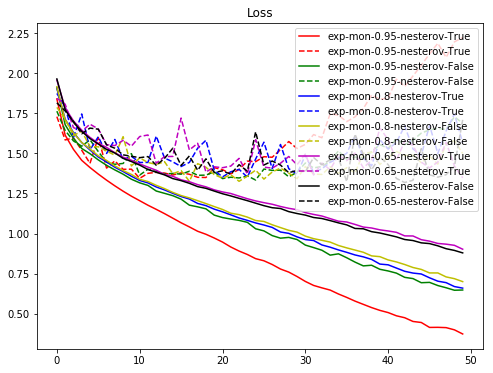

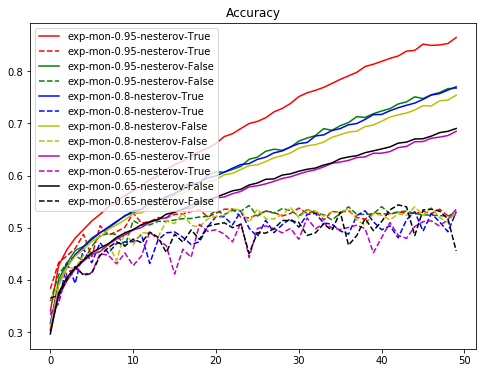

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()